
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 5 - Policy Gradient </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2024 - Nov 30, 2024</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
 
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Policy gradient with and without baseline</a>
* <a href='#2.1'> 2.1 Training Loop</a>
* <a href='#2.2'> 2.2 Policy with Fixed Variance </a>
* <a href='#2.3'> 2.3 PG Objects</a>
* <a href='#3.'> 3. Choosing the value of variance </a>
* <a href='#3.1'> 3.1 Policy with Learned Variance </a>
* <a href='#4.'> 4. PG and experience replay </a>
* <a href='#5.'> 5. Real-world control problems </a>
* <a href='#6.'> 6. Discrete action spaces </a>
* <a href='#7.'> 7. Submitting </a>
* <a href='#7.1'> 7.1 Feedback </a>
* <a href='#8.'> References</a>

<a href='#T1'><b>Student Task 1.</b> Implementing Reinforce PG algorithm </a>\
<a href='#T1a'><b>Student Task 1a.</b> Basic REINFORCE without baseline (15 points) </a>\
<a href='#T1b'><b>Student Task 1b.</b> REINFORCE with a constant baseline b = 20 (5 points) </a>\
<a href='#T1c'><b>Student Task 1c.</b> REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points) </a>\
<a href='#Q1'><b>Student Question 1.1</b> A good baseline (15 points) </a>\
<a href='#T2'><b>Student Task 2.</b> Making Variance a Learnable Parameter (10 points) </a>\
<a href='#Q2'><b>Student Question 2.1</b> Constant vs Learnable Variance (5 points) </a>\
<a href='#Q3'><b>Student Question 2.2</b> Learnable Variance Initial Performance (5 points) </a> \
<a href='#Q4'><b>Student Question 3.</b> Considering a experience reply buffer (15 points)</a>\
<a href='#Q5'><b>Student Question 4.1</b> Considering an unbounded continuous action space part 1(5 points) </a>\
<a href='#Q6'><b>Student Question 4.2</b> Considering an unbounded continuous action space part 2 (10 points) </a>\
<a href='#Q7'><b>Student Question 5.</b> Considering discrete action spaces (10 points)</a>
    
**Total Points:** 100

**Estimated runtime of all the cells:** 2 hours

# 1. Introduction <a id='1.'></a>
In this exercise, we will implement the REINFORCE policy gradient algorithm for [InvertedPendulum environment](https://gymnasium.farama.org/environments/mujoco/inverted_pendulum/). The InvertedPendulum is similar to the previously used CartPole environment, except it has a continuous action space: the action can now have values in a range of [−3,3]. The action value represents a numerical force applied to the cart, with magnitude representing the amount of force and sign representing the direction.

## 1.2 Learning Objectives <a id='1.2'></a>
- To understand how policy gradient works
- To implement the REINFORCE policy gradient algorithm
- To understand the limits and use cases of policy gradient

## 1.3 Code Structure and Files <a id='1.3'></a>
You don’t have to edit any other file other than ```ex5.ipynb``` to complete this exercise.

```
├───cfg                  # Config files for environments e.g. define the maximum number of steps in an episode.
├───imgs                 # Images used in notebook
├───results 
│   ├───logging          # Contains logged data
│   ├───model            # Contains the policies learned
│   └───video            # Contains videos for each environment
│       └───InvertedPendulum-v4
│       │  └───test      # Videos saved during testing
│       │  └───train     # Videos saved during training
│   ex5.ipynb            # Main assignment file containing tasks <---------
│   setup.py             # Contains setup function
│   utils.py             # Contains useful functions 
```
---
The foundational class, `PG`, stands as the base class for the Policy Gradient. Three additional classes - `PGNoBase(PG)`, `PGBase20(PG)`, and `PGGamma(PG)` - inherit from this base class. Each class corresponds to a different variant of the policy gradient:

- `PGNoBase(PG)`: Implements the vanilla Policy Gradient without a baseline.
- `PGBase20(PG)`: Utilizes a baseline of 20.
- `PGGamma(PG)`: Employs PG gamma with discounted rewards normalized to zero mean and unit variance.

# 2. Policy gradient with and without baseline <a id='2.'></a>

## Warnings:

- Don’t copy and paste cells within a notebook. This will mess up the tracking metadata and prevent autograding from working.
- Only add new cells using the '+' button in the upper toolbar and do not split cells.
- Be cautious about things such as copying the whole notebook to Colab to work on it. This has sometimes resulted in removing all notebook metadata, making autograding impossible.

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing Reinforce PG algorithm (25 points) </h3> 

Implement the REINFORCE policy gradient algorithm to balance the InvertedPendulum. 
<br> Use constant standard deviation $\sigma = 1$ (i.e. $\log(\sigma) = 0$) for the output action distribution throughout the training. Implement:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (a) basic REINFORCE without baseline (15 points),

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (b) REINFORCE with a constant baseline b = 20 (5 points),

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (c) REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points),
    
**Complete the all the unfinished implementation in following cells (marked with ```TODOs```)**. 
    
1. **Train Loop Function**: Finalize the `train_iteration(agent, env)` function to establish the training loop, similarly to how it was done in Exercise 1.
2. **Policy Class with Fixed Variance**: Complete the `PolicyFixedVar(nn.Module)` class to generate a policy with a fixed variance.
3. **Get Action Method**: Finish the `get_action(self, observation, evaluation=False)` method within the `PG` class, ensuring it can be inherited effectively.
4. **Complete PG Classes**: Implepment the `PGNoBase(PG)`, `PGBase20(PG)`, and `PGGamma(PG)` classes, each tailored with a different baseline.

**Hint:** The ```class PolicyFixedVar(nn.Module)```  contains a basic neural network structure. And we include reasonable
hyperparameters in the ```cfg``` folder.

**Hint:** Your policy should output a probability distribution over actions. A suitable and straightforward choice is to use a normal distribution (`from torch.distributions import Normal`). Compute log probabilities using the `log_prob` function of the distribution. We strongly recommend you to read the official PyTorch documentation to learn how to use the distributions and related functions.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [8]:
skip_training = False  # Set this flag to True before validation and submission

In [9]:
# Importing system and path-related modules
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

# Importing PyTorch related modules
import torch
from torch import nn
from torch.distributions import Normal
import torch.nn.functional as F

# Importing other third-party modules
import numpy as np
import yaml
from pathlib import Path
from IPython.display import Video  # to display videos

# Importing local utility modules
import utils as u
from setup import setup

# Setting the device for storing tensors/calculations
device = 'cpu'

## 2.1 Training Loop <a id='2.1'></a>

In the subsequent cell, a foundational framework is provided for training a Reinforcement Learning (RL) agent employing the REINFORCE algorithm. It is constructed to efficiently monitor the agent's progress and performance throughout the training phase. Please complete the training loop, marked with `TODO`, to finalize the setup for the agent’s training process.

In [10]:
def to_numpy(tensor):
    """
    Convert a PyTorch tensor to a NumPy array.

    :param tensor: A PyTorch tensor.
    :return: The converted NumPy array.
    """
    # Squeeze the tensor, move it to CPU and convert to NumPy array
    return tensor.squeeze(0).cpu().numpy()


def train_iteration(agent, env):
    # Policy training function

    # Reset the environment and observe the initial state
    reward_sum, timesteps, done = 0, 0, False
    obs, _ = env.reset(seed=409)

    while not done:
        # TODO: Task 1: finish the train loop, including 
        # 1. Call agent.get_action to get action and log prob of the action
        # 2. Call env.step with the action (note: you need to convert the action into a numpy array -- use the function to_numpy for this)
        #   (Steps 1. and 2. you can also find from the 'test' function below)
        # 3. Store the log prob of action and reward by calling agent.record
        # 4. Update reward_sum by adding the reward received from env.step, and increase timesteps by one
        # 5. Use the observation you receive from env.step to call agent.get_action for the next timestep 
        #   (Hint: ensure to use the `.copy()` method to avoid unexpected behavior due to aliasing.)

        ########### Your code starts here ###########
        # Get action from the agent

        # Perform the action on the environment, get new state and reward
    
        # Store agent's and env's outcome (so that the agent can improve its policy)

        # Store total episode reward
 
        # update observation
        # 1. 获取动作
        action, act_logprob = agent.get_action(obs)
        
        # 2. 执行动作
        obs_next, reward, done, _, _ = env.step(to_numpy(action))
        
        # 3. 记录
        agent.record(act_logprob, reward)
        
        # 4. 更新统计
        reward_sum += reward
        timesteps += 1
        
        # 5. 更新观察 - 关键：使用 .copy()
        obs = obs_next.copy()

        ########## Your codes ends here. ##########
        if timesteps >= 1000:
            done = True
            
    # Update the policy after one episode
    info = agent.update()

    # Return stats of training
    info.update({'timesteps': timesteps,
                'ep_reward': reward_sum,})
    return info


def train(agent_class, cfg_path, cfg_args={}):
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    performance_data = []
    
    if cfg.save_logging: 
        u.make_dir(Path().cwd()/'results'/cfg.env_name/"logging")
        L = u.Logger() # create a simple logger to record stats
        
    # Get state and action dimensionality
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    # Initialise the policy gradient agent
    agent = agent_class(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))
    
    for ep in range(cfg.train_episodes):
        # collect data and update the policy
        train_info = train_iteration(agent, env)
        train_info.update({'episodes': ep})

        if cfg.save_logging:
            L.log(**train_info)
        if (not cfg.silent) and (ep % 100 == 0):
            print({"ep": ep, **train_info})

        performance_data.append(train_info)
        
    u.plot_training_data(performance_data)
    if cfg.save_model:
        agent.save(cfg.model_path)
    
    print("Training complete!")
    

# Function to test a trained policy
@torch.no_grad()
def test(agent_class, cfg_path, cfg_args={}, num_episodes=10, seeds=None):
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    
    # Get state and action dimensionality
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    # Initialise the policy gradient agent
    agent = agent_class(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))
    
    print("Loading model from", cfg.model_path, "...")
    agent.load(cfg.model_path)
        
    test_rewards = []
    for ep in range(num_episodes):

        if seeds != None:
            test_seed = seeds[ep % len(seeds)]
            print("Episode seed: ", test_seed)
            (obs, _)  = env.reset(seed=test_seed)
        else :
            (obs, _)  = env.reset()
        done=  False
        test_reward = 0
        timesteps = 0
        
        while not done:
            # Similar to the training loop above -
            # get the action, act on the environment, save total reward
            # (evaluation=True makes the agent always return what it thinks to be
            # the best action - there is no exploration at this point)
            action, _ = agent.get_action(obs, evaluation=True)

            
            obs, reward, done, _, info = env.step(to_numpy(action))
            timesteps += 1
            test_reward += reward
            
            if timesteps >= 1000:
                done = True
        test_rewards.append(test_reward)

        print("Test ep_reward:", test_reward)

    print("Median test reward:", np.median(test_rewards))

## 2.2 Policy with Fixed Variance <a id='2.2'></a>

This code is designed to establish a neural network policy where the variance is constant. The `PolicyFixedVar` class, which is a subclass of `nn.Module`, defines this policy. The policy uses a neural network to map states to actions, outputting a normal distribution with a mean and a standard deviation. 

#### Task:
1. **Implementing actor_logstd:**
   - Initialize `self.actor_logstd` as a torch tensor with zeros, ensuring to set the `device` parameter for appropriate storage.

2. **Create and Return Distribution:**
   - In the `forward` method, create a Normal distribution (`probs`) with the computed `action_mean` and `action_std`. This distribution represents the policy’s output given a state input.

In [11]:
# Initialisation function for neural network layers
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


# This class defines the neural network policy
class PolicyFixedVar(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyFixedVar, self).__init__()

        # Initialise a neural network with two hidden layers (64 neurons per layer)
        self.actor_mean = nn.Sequential(
            layer_init(nn.Linear(state_dim, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, action_dim), std=0.01),
        )

        # TODO: Task 1: Implement actor_logstd as a torch tensor. 
        # Hint: when creating the torch tensor, remember to set the parameter device=device 
        #       so the tensor is stored correctly on CUDA (if applicable) 
        ########## Your code starts here. ###########
        self.actor_logstd = nn.Parameter(torch.ones(action_dim) * float(logstd_init))     
        ########## Your code ends here. ##########

    # Do a forward pass to map state to action
    def forward(self, state):
        # Get mean of a Normal distribution (the output of the neural network)
        action_mean = self.actor_mean(state)

        # Make sure action_logstd matches dimension of action_mean
        action_logstd = self.actor_logstd.expand_as(action_mean)

        # Exponentiate the log std to get actual std
        action_std = torch.exp(action_logstd)

        # TODO: Task 1: Create a Normal distribution with mean of 'action_mean' and standard deviation of 'action_std', and return the distribution
        # Use the torch.distributions class
        ########## Your code starts here. ###########
        probs = Normal(action_mean, action_std)
        ########## Your code ends here. ##########
        return probs

In [12]:
# Test Policy
def test_return_class():
    policy = PolicyFixedVar(4, 1)
    x = torch.Tensor((1.,2.,3.,4.)).reshape((1,4))
    assert isinstance( policy.forward(x),Normal)

test_return_class()

NameError: name 'logstd_init' is not defined

## 2.3 PG Objects <a id='2.3'></a>

The `PG` class is defined as the Policy Gradient base class. This class forms the foundation for implementing policy gradient algorithms, providing a structured format and placeholders for essential functions and variables used in these algorithms. The methods within this class will be used to interact with, update, and manage the policy used by the agent to make decisions in the environment.

Task: Implementing the `get_action` Method.

In [65]:
# Class for the Policy Gradient algorithm
class PG(object):
    def __init__(self, state_dim, action_dim, lr, gamma):
        # Define the neural network policy with fixed variance 
        self.policy = PolicyFixedVar(state_dim, action_dim).to(device)

        # Create an optimizer
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)

        # Set discount factor value
        self.gamma = gamma

        # Simple buffers for action probabilities and rewards
        self.action_probs = []
        self.rewards = []

    def update(self):
        pass

    def record(self, action_prob, reward):
        """ Store agent's and env's outcomes to update the agent."""
        self.action_probs.append(action_prob)
        self.rewards.append(torch.tensor([reward]))

    def save(self, filepath):
        torch.save(self.policy.state_dict(), filepath)

    def load(self, filepath):
        self.policy.load_state_dict(torch.load(filepath))
    
    def get_action(self, observation, evaluation=False):
        """Return action and logprob of this action."""

        # Add batch dimension if necessary
        if observation.ndim == 1: 
            observation = observation[None]

        # Convert observation to a torch tensor
        x = torch.from_numpy(observation).float().to(device)

        # TODO: Task 1: Calculate action and its log_prob
        ########## Your code starts here. ###########
        # Hint: 
        #   1. when evaluation=True, return mean, otherwise return samples from the distribution created in self.policy.forward() function.
        #   2. notice the shape of action and act_logprob.
        
        # Pass state x through the policy network (T1)

        # Return mean if evaluation, else sample from the distribution

        # Calculate the log probability of the action (T1)
        # Pass state x through the policy network
        probs = self.policy(x)
        # 采样或取均值
        if evaluation:
            action = probs.mean
        else:
            action = probs.sample()

        # 计算 log 概率
        # 计算 log 概率 - 不要 keepdim
        act_logprob = probs.log_prob(action).sum(dim=-1)  # shape: (1,)
        ########## Your code ends here. ##########
        
        if observation.ndim == 1: 
            action = action[0]

        return action, act_logprob

<a id='T1a'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1a.</b> Basic REINFORCE without baseline (15 points) </h3> 
The training performance plot might look like Figure 1a. 
    <figure style="text-align: center">
    <img src="imgs/PGNoBase.svg" width="600px">
    <figcaption style="text-align: center"> Figure 1a: REINFORCE without baseline. </figcaption>
    </figure>
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [23]:
class PGNoBase(PG):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)

    # TODO: Task 1: Implement the policy gradient
    # Complete the following 2 functions
    # Hints:
    #   1. compute discounted rewards (use the discount_rewards function offered in common.helper)
    #   2. compute the policy gradient loss
    
    # Compute discounted rewards 
    def calculate_discounted_rewards(self, rewards):
        ########## Your code starts here. ##########
        discounted_rewards = []
        cumulative = 0
        for reward in reversed(rewards):
            cumulative = reward + self.gamma * cumulative
            discounted_rewards.insert(0, cumulative)
    
        discounted_rewards = torch.tensor(discounted_rewards, device=device)
        ########## Your code ends here. ##########
        return discounted_rewards

    # Calculate the PG loss
    def calculate_loss(self, action_probs, discounted_rewards):
        ########## Your code starts here. ##########
        loss = -torch.mean(action_probs * discounted_rewards)

        ########## Your code ends here. ##########
        return loss
    
    def update(self):
        # Prepare dataset used to update policy
        action_probs = torch.stack(self.action_probs, dim=0).to(device).squeeze(-1) # shape: [batch_size,]
        rewards = torch.stack(self.rewards, dim=0).to(device).squeeze(-1) # shape [batch_size,]
        self.action_probs, self.rewards = [], [] # clean buffers
        
        # Task 1: Implement the policy gradient
        
        # Compute discounted rewards 
        discounted_rewards = self.calculate_discounted_rewards(rewards)

        # Calculate the PG loss
        loss = self.calculate_loss(action_probs, discounted_rewards)
       
        # Backprop gradients
        loss.backward()  

        # Do the optimizer step 
        self.optimizer.step() 
        self.optimizer.zero_grad() 

        # if you want to log something in wandb, you can put them inside the {}, otherwise, just leave it empty.
        return {'logstd': self.policy.actor_logstd.cpu().detach().numpy()}

In [24]:
%%capture --no-stdout
"TEST CELL"
#Test get_action method
def test_get_action_1():
    cfg_path=Path().cwd()/'cfg'/'inverted_pendulum.yaml'
    env, cfg = setup(cfg_path, cfg_args={"model_name":"PG","seed": 43})
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    agent = PG(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))
    obs = np.array( [0.00565713,  0.00385536, -0.09085017,  0.20961052] )
    action = -0.0009746950818225741
    assert np.allclose(agent.get_action(obs,True)[0].item(),action,0.001)
    
    agent2 = PG(state_dim, 3, float(cfg.lr), float(cfg.gamma))
    assert tuple(agent2.get_action(obs,True)[1].shape) == (1,)

test_get_action_1()

Numpy/Torch/Random Seed:  43


In [25]:
%%capture --no-stdout
"TEST CELL"

Numpy/Torch/Random Seed:  409
{'ep': 0, 'logstd': array([0.], dtype=float32), 'timesteps': 5, 'ep_reward': 5.0, 'episodes': 0}
{'ep': 100, 'logstd': array([0.], dtype=float32), 'timesteps': 58, 'ep_reward': 58.0, 'episodes': 100}
{'ep': 200, 'logstd': array([0.], dtype=float32), 'timesteps': 13, 'ep_reward': 13.0, 'episodes': 200}
{'ep': 300, 'logstd': array([0.], dtype=float32), 'timesteps': 43, 'ep_reward': 43.0, 'episodes': 300}
{'ep': 400, 'logstd': array([0.], dtype=float32), 'timesteps': 56, 'ep_reward': 56.0, 'episodes': 400}
{'ep': 500, 'logstd': array([0.], dtype=float32), 'timesteps': 39, 'ep_reward': 39.0, 'episodes': 500}
{'ep': 600, 'logstd': array([0.], dtype=float32), 'timesteps': 15, 'ep_reward': 15.0, 'episodes': 600}
{'ep': 700, 'logstd': array([0.], dtype=float32), 'timesteps': 25, 'ep_reward': 25.0, 'episodes': 700}
{'ep': 800, 'logstd': array([0.], dtype=float32), 'timesteps': 43, 'ep_reward': 43.0, 'episodes': 800}
{'ep': 900, 'logstd': array([0.], dtype=float32),

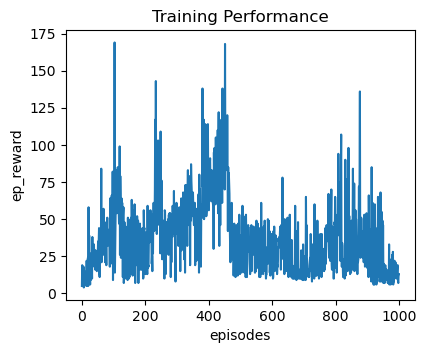

Training complete!


In [26]:
if not skip_training:
    train(PGNoBase, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGNoBase")) # < 7 mins

In [27]:
if not skip_training:
    test(PGNoBase, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGNoBase", save_video=True, testing=True)) 

Numpy/Torch/Random Seed:  409
Loading model from /notebooks/rl2025/ex5/results/InvertedPendulum-v4/model/PGNoBase_params.pt ...
Test ep_reward: 7.0
Test ep_reward: 10.0
Test ep_reward: 9.0
Test ep_reward: 6.0
Test ep_reward: 16.0
Test ep_reward: 8.0
Test ep_reward: 10.0
Test ep_reward: 35.0
Test ep_reward: 13.0
Test ep_reward: 14.0
Median test reward: 10.0


In [28]:
%%capture --no-stdout
"TEST CELL"
def test_pgnobase_update_1():
    agent_class = PGNoBase
    cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml'
    cfg_args=dict(model_name="PGNoBase", seed=43)
    env, cfg = setup(cfg_path, cfg_args=cfg_args)

    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    agent = agent_class(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))

    test_reward = torch.Tensor([1., 1., 1., 1., 1., 1., 1., 1.])
    test_action_prob = torch.Tensor([-2.4205, -2.1635, -1.2791, -1.2655, -0.9205, -0.9366, -4.9679, -2.1623])
    test_discounted_reward = torch.Tensor([7.7255, 6.7935, 5.8520, 4.9010, 3.9404, 2.9701, 1.9900, 1.0000])

    assert torch.allclose(agent.calculate_discounted_rewards(test_reward), test_discounted_reward, 0.001)
    assert torch.allclose(agent.calculate_loss(test_action_prob, test_discounted_reward), torch.tensor(8.1928), 0.001)

test_pgnobase_update_1()

Numpy/Torch/Random Seed:  43


In [29]:
%%capture --no-stdout
"TEST CELL"

In [30]:
if not skip_training:
      video = Video(Path().cwd()/'results'/'InvertedPendulum-v4'/'video'/'test'/'ex5-episode-5.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

In [31]:
if not skip_training:
      video = Video(Path().cwd()/'results'/'InvertedPendulum-v4'/'video'/'test'/'ex5-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

<a id='T1b'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1b.</b> REINFORCE with a constant baseline b = 20 (5 points) </h3> 
    The training performance plot might look like Figure 1b.
    <figure style="text-align: center" id="figure-1b">
        <img src="imgs/PGBase20.svg" width="600px">
        <figcaption style="text-align: center"> Figure 1b: REINFORCE with a constant baseline 20. </figcaption>
    </figure>
    
🔝 <a href='#TOC'><b>Table of Contents</b></a>
</div>



In [32]:
class PGBase20(PG):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)

    # TODO: Task 1: Implement the policy gradient
    # Complete the following 2 functions
    # Hints:
    #   1. compute discounted rewards (use the discount_rewards function offered in common.helper)
    #   2. compute the policy gradient loss with the baseline
    
    # Compute discounted rewards 
    def calculate_discounted_rewards(self, rewards):
        ########## Your code starts here. ##########
        discounted_rewards = []
        cumulative = 0
        for reward in reversed(rewards):
            cumulative = reward + self.gamma * cumulative
            discounted_rewards.insert(0, cumulative)
        discounted_rewards = torch.tensor(discounted_rewards, device=device)
        ########## Your code ends here. ##########
        return discounted_rewards

    # Calculate the PG loss with the baseline
    def calculate_loss(self, action_probs, discounted_rewards):
        ########## Your code starts here. ##########
        baseline = 20
        advantages = discounted_rewards - baseline  # 现在可以正常相减了
        loss = -torch.mean(action_probs * advantages)
        ########## Your code ends here. ##########
        return loss

    def update(self):
        # Prepare dataset used to update policy
        action_probs = torch.stack(self.action_probs, dim=0).to(device).squeeze(-1) # shape: [batch_size,]
        rewards = torch.stack(self.rewards, dim=0).to(device).squeeze(-1) # shape [batch_size,]
        self.action_probs, self.rewards = [], [] # clean buffers
        
        # TODO: Task 1: Implement the policy gradient

        # Compute discounted rewards 
        discounted_rewards = self.calculate_discounted_rewards(rewards)
        # Calculate the PG loss with the baseline
        loss = self.calculate_loss(action_probs, discounted_rewards)
        # Backprop gradients
        loss.backward()
        # Do the optimizer step
        self.optimizer.step()
        self.optimizer.zero_grad()

        # if you want to log something in wandb, you can put them inside the {}, otherwise, just leave it empty.
        return {'logstd': self.policy.actor_logstd.cpu().detach().numpy()}

Numpy/Torch/Random Seed:  409
{'ep': 0, 'logstd': array([0.], dtype=float32), 'timesteps': 5, 'ep_reward': 5.0, 'episodes': 0}
{'ep': 100, 'logstd': array([0.], dtype=float32), 'timesteps': 50, 'ep_reward': 50.0, 'episodes': 100}
{'ep': 200, 'logstd': array([0.], dtype=float32), 'timesteps': 52, 'ep_reward': 52.0, 'episodes': 200}
{'ep': 300, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 300}
{'ep': 400, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 400}
{'ep': 500, 'logstd': array([0.], dtype=float32), 'timesteps': 832, 'ep_reward': 832.0, 'episodes': 500}
{'ep': 600, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 600}
{'ep': 700, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 700}
{'ep': 800, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 800}
{'ep': 900, 'logstd': array

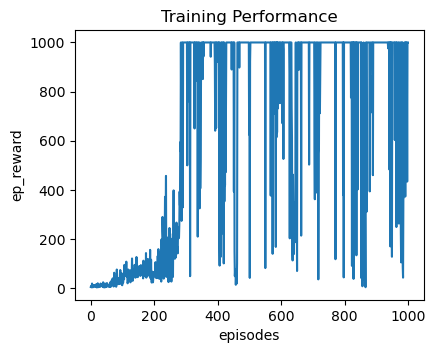

Training complete!


In [33]:
if not skip_training:
    train(PGBase20, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGBase20")) # < 7 mins

In [34]:
if not skip_training:
    test(PGBase20, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGBase20", save_video=True, testing=True)) 

Numpy/Torch/Random Seed:  409
Loading model from /notebooks/rl2025/ex5/results/InvertedPendulum-v4/model/PGBase20_params.pt ...
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Median test reward: 1000.0


In [35]:
%%capture --no-stdout
"TEST CELL"
def test_pgbase20_update_1():
    
    agent_class = PGBase20
    cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml'
    cfg_args=dict(model_name="PGBase20", seed=43)
    env, cfg = setup(cfg_path, cfg_args=cfg_args)

    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    agent = agent_class(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))

    test_reward = torch.Tensor([1., 1., 1., 1., 1., 1., 1., 1.])
    test_action_prob = torch.Tensor([-2.4205, -2.1635, -1.2791, -1.2655, -0.9205, -0.9366, -4.9679, -2.1623])
    test_discounted_reward = torch.Tensor([7.7255, 6.7935, 5.8520, 4.9010, 3.9404, 2.9701, 1.9900, 1.0000])

    assert torch.allclose(agent.calculate_discounted_rewards(test_reward), test_discounted_reward, 0.001)
    assert torch.allclose(agent.calculate_loss(test_action_prob, test_discounted_reward), torch.tensor(-32.0970), 0.001)

test_pgbase20_update_1()

Numpy/Torch/Random Seed:  43


In [36]:
%%capture --no-stdout
"TEST CELL"

In [37]:
if not skip_training:
      video = Video(Path().cwd() / 'results' / 'InvertedPendulum-v4' / 'video' / 'test' / 'ex5-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

<a id='T1c'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1c.</b> REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points) </h3> 
    The training performance plot might look like Figure 1c. 
    <figure style="text-align: center" id="figure-1c">
        <img src="imgs/PGGamma.svg" width="600px">
        <figcaption style="text-align: center"> Figure 1c: REINFORCE with discounted rewards normalized to zero mean and unit variance. </figcaption>
    </figure>
    
🔝 <a href='#TOC'><b>Table of Contents</b></a>
</div>



In [56]:
class PGNormalized(PG):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)

    # TODO: Task 1: Implement the policy gradient
    # Complete the following 2 functions
    # Hints:
    #   1. compute discounted rewards (use the discount_rewards function offered in utils.py)
    #   2. compute the policy gradient loss
    
    # Compute discounted rewards 
    def calculate_discounted_rewards(self, rewards):
        ########## Your code starts here. ##########

        discounted_rewards = []
        cumulative = 0
        for reward in reversed(rewards):
            cumulative = reward + self.gamma * cumulative
            discounted_rewards.insert(0, cumulative)

        # 修复：添加 device=device 参数，确保张量与模型在同一设备上
        discounted_rewards = torch.tensor(discounted_rewards, device=device)

        mean = discounted_rewards.mean()
        std = discounted_rewards.std()
        # 增加一个小的 epsilon 防止标准差为零导致除法错误
        if std > 1e-8:
            discounted_rewards = (discounted_rewards - mean) / (std + 1e-8)
        else:
            # 如果标准差接近于0，只进行中心化
            discounted_rewards = discounted_rewards - mean
        ########## Your code ends here. ##########
        return discounted_rewards

    # Calculate the PG loss with the baseline
    def calculate_loss(self, action_probs, discounted_rewards):
        ########## Your code starts here. ##########
        loss = -torch.mean(action_probs * discounted_rewards)
        ########## Your code ends here. ##########
        return loss



    def update(self):
        # Prepare dataset used to update policy
        action_probs = torch.stack(self.action_probs, dim=0).to(device).squeeze(-1) # shape: [batch_size,]
        rewards = torch.stack(self.rewards, dim=0).to(device).squeeze(-1) # shape [batch_size,]
        self.action_probs, self.rewards = [], [] # clean buffers
        
        # TODO: Task 1: Implement the policy gradient
        
        # Compute discounted rewards and normalize them
        discounted_rewards = self.calculate_discounted_rewards(rewards)
        # Calculate the PG loss
        loss = self.calculate_loss(action_probs, discounted_rewards)
        # Backprop gradients
        loss.backward()
        # Do the optimizer step
        self.optimizer.step()
        self.optimizer.zero_grad()    

        # if you want to log something in wandb, you can put them inside the {}, otherwise, just leave it empty.
        return {'logstd': self.policy.actor_logstd.cpu().detach().numpy()}

Numpy/Torch/Random Seed:  409
{'ep': 0, 'logstd': array([0.], dtype=float32), 'timesteps': 5, 'ep_reward': 5.0, 'episodes': 0}
{'ep': 100, 'logstd': array([0.], dtype=float32), 'timesteps': 77, 'ep_reward': 77.0, 'episodes': 100}
{'ep': 200, 'logstd': array([0.], dtype=float32), 'timesteps': 144, 'ep_reward': 144.0, 'episodes': 200}
{'ep': 300, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 300}
{'ep': 400, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 400}
{'ep': 500, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 500}
{'ep': 600, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 600}
{'ep': 700, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 700}
{'ep': 800, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 800}
{'ep': 900, 'logstd': a

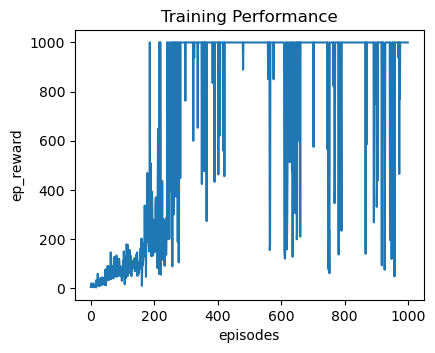

Training complete!


In [57]:
if not skip_training:
    train(PGNormalized, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGNormalized")) # < 10 mins

In [58]:
if not skip_training:
    test(PGNormalized, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGNormalized", save_video=True, testing=True))

Numpy/Torch/Random Seed:  409
Loading model from /notebooks/rl2025/ex5/results/InvertedPendulum-v4/model/PGNormalized_params.pt ...
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Median test reward: 1000.0


In [59]:
%%capture --no-stdout
"TEST CELL"
def test_pgnormalized_update_1():
    
    agent_class = PGNormalized
    cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml'
    cfg_args=dict(model_name="PGNormalized", seed=43)
    env, cfg = setup(cfg_path, cfg_args=cfg_args)

    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    agent = agent_class(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))

    test_reward = torch.Tensor([1., 1., 1., 1., 1., 1., 1., 1.])
    test_action_prob = torch.Tensor([-2.4205, -2.1635, -1.2791, -1.2655, -0.9205, -0.9366, -4.9679, -2.1623])
    test_discounted_reward = torch.Tensor([7.7255, 6.7935, 5.8520, 4.9010, 3.9404, 2.9701, 1.9900, 1.0000])

    assert torch.allclose(agent.calculate_discounted_rewards(test_reward), test_discounted_reward, 0.001)
    assert torch.allclose(agent.calculate_loss(test_action_prob, test_discounted_reward), torch.tensor(-0.2822), 0.001)

test_pgnormalized_update_1()

Numpy/Torch/Random Seed:  43


AssertionError: 

In [42]:
%%capture --no-stdout
"TEST CELL"

In [43]:
if not skip_training:
      video = Video(Path().cwd() / 'results' / 'InvertedPendulum-v4' / 'video' / 'test' / 'ex5-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> A good baseline (15 points) </h3> 

Which of the following statements correctly describe how to choose a good baseline and why it makes training more stable? **Select 5 options.**
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Options:

1. A good baseline doesn't affect the expectation (doesn't introduce bias) but reduces variance of the estimated gradients. 
2. The baseline should be dependent on both the state and the action to provide the most accurate estimates.
3. The optimal baseline can be theoretically derived, but it is too expensive to calculate in practice. 
4.  A good baseline should be a constant value to ensure consistency across all states. 
5.  The lower variance estimates lead to more stable training. 
6.  A good choice of baseline is an estimate of the state value, or the empirical mean (when doing Monte Carlo roll-outs). 
7.  The idea with both is that we increase the probability of actions that lead to higher returns than what our current estimate of the expected return is. 
8.  A proper baseline eliminates the need for exploration in reinforcement learning algorithms. 
9.  The choice of baseline has no impact on the convergence speed of the algorithm.


In [ ]:
# Answer question 1.1 with appropriate option numbers
sq1_1 = [] 

The following cells are used for grading.

# 3. Choosing the value of variance <a id='3.'></a>

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Making Variance a Learnable Parameter (10 points) </h3> 

Implement the policy’s variance as a learnable parameter of the network and update it during training. Set the initial value $\sigma_0^2$ to 1. REINFORCE with normalized discounted returns is used for this task.

**Complete the unfinished implementation in ```PolicyLearnedVar(nn.Module)``` class (marked with ```TODOs```)**. 
    
    
**Hint:** To make your learned variance automatically updated by the optimizer, declare your variable inside the ```__init__``` function of the model using ```torch.nn.Parameter(some_tensor)```. 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


## 3.1 Policy with Learned Variance <a id='3.1'></a>

In [ ]:
# Initialisation function for neural network layers
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


# This class defines the neural network policy with learned variance
class PolicyLearnedVar(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyLearnedVar, self).__init__()

        # Initialise a neural network with two hidden layers (64 neurons per layer)
        self.actor_mean = nn.Sequential(
            layer_init(nn.Linear(state_dim, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, action_dim), std=0.01),
        )

        # TODO: Task 2: Implement actor_logstd as a learnable parameter
        # Use log of std to make sure std doesn't become negative during training
        ########## Your code starts here. ###########    

        ########## Your code ends here. ##########
        
    # Do a forward pass to map state to action
    def forward(self, state):
        # Get mean of a Normal distribution (the output of the neural network)
        action_mean = self.actor_mean(state)

        # Make sure action_logstd matches dimension of action_mean
        action_logstd = self.actor_logstd.expand_as(action_mean)

        # Exponentiate the log std to get actual std
        action_std = torch.exp(action_logstd)

        # TODO: Task 1: Create a Normal distribution with mean of 'action_mean' and standard deviation of 'action_std', and return the distribution
        ########## Your code starts here. ###########

        ########## Your code ends here. ##########
        return probs

Initialize the `PG` class to construct the neural network policy. Continue to employ the `get_action` function, as outlined in Task 1.

In [ ]:
# Class for the Policy Gradient algorithm
class PGLearnedVar(PGNormalized):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)
        
        # TODO: Task 2: Define the neural network policy (self.policy) with learned variance.
        self.policy = None
        ########## Your code starts here. ###########  

        ########## Your code ends here. ##########

        # Create an optimizer
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)

In [ ]:
if not skip_training:
    train(PGLearnedVar, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGLearnedVar")) # < 10 mins

In [ ]:
if not skip_training:
    test(PGLearnedVar, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(model_name="PGLearnedVar", save_video=True, testing=True))

In [ ]:
if not skip_training:
    video = Video(Path().cwd() / 'results' / 'InvertedPendulum-v4' / 'video' / 'test' / 'ex5-episode-0.mp4',
    embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
    display(video)

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.1</b> Constant vs Learnable Variance (5 points) </h3> 

Which of the following statements accurately describe the strengths and weaknesses of using constant variance vs. learning the variance during training? **Select 5 options.**      
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Options:

1. Variance is directly tied to exploration, with greater variance leading to more random actions and more exploration. 
2.  Learned variance always leads to better results than constant variance. 
3.  Constant variance is a simple solution that guarantees a certain level of exploration throughout training. 
4.  If constant variance is set too low, it can result in faster convergence to the optimal policy. 
5.  If the constant variance is set too high, it can handle very challenging environments by seeing through the randomness in selected actions.
6.  Learning the variance allows the agent to adapt its exploration needs throughout training. 
7. Constant variance makes it possible for the agent to explore more at the beginning and less as the policy improves. 
8. Learning the variance can potentially reduce variance when actions are good and increase it when actions are bad. 
9. Understanding how learned variance behaves during optimization can be challenging.
10. Constant variance is computationally more expensive than learned variance.


In [ ]:
# Answer question 2.1 with appropriate option numbers
sq2_1 = [] 

The following cells are used for grading.

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.2</b> Learnable Variance Initial Performance (5 points) </h3> 

In the case of learned variance, what are the impacts of initialization on the training performance? **Select 4 options.**

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Options:
    
1. A larger initial value allows for more exploration at the beginning of training. 
2. A lower initial value tends to favor exploitation over exploration initially. 
3. The initial variance value has no impact on the final performance of the trained policy. 
4. If the initial value is too low or too high, training can be slower and may require more data. 
5. A high initial variance leads to better final performance regardless of the task. 
6. The impact of the initial variance diminishes as training progresses and the variance is learned. 
7. The optimal initial variance can be theoretically calculated for any given task. 
8. If the variance decreases too rapidly, the optimizer might become trapped in a local minimum.
9. Changing the initial variance is equivalent to adjusting the learning rate of the optimizer. 
10. The initial variance affects only the beginning of training.


In [ ]:
# Answer question 2.2 with appropriate option numbers
sq2_2 = [] 

The following cells are used for grading.

# 4. PG and experience replay <a id='4.'></a>

<a id='Q4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 3.</b> Considering an experience replay buffer (15 points) </h3> 

Why can't the REINFORCE method implemented in this exercise be directly used with experience replay? Which steps of the algorithm would be problematic, and how could these issues potentially be resolved? **Select 4 options.**

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Options:

1.  REINFORCE is inherently off-policy and can be directly used with experience replay without modifications. 
2.  REINFORCE is an on-policy method, making it incompatible with off-policy data from a replay buffer. 
3. The problematic step is in the policy evaluation process, as the stored rewards may not reflect the current policy's performance.
4.  The problem can be mitigated by frequently updating the replay buffer with experiences from more recent policies.
5.  The expectation of the gradient must be calculated over the current policy in REINFORCE. 
6.  REINFORCE requires sequential data, which is disrupted by the random sampling in experience replay. 
7.  Computing the expectation term is difficult with experiences from policies other than the current one. 
8.  There is no way to use REINFORCE with experience replay under any circumstances.
9.  Importance sampling can be used to estimate the gradients and potentially resolve the issue. 


In [ ]:
# Answer question 3 with appropriate option numbers
sq3 = [] 

The following cells are used for grading.

# 5. Real-world control problems <a id='5.'></a>

<a id='Q5'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Considering an unbounded continuous action space part 1 (5 points) </h3> 

What could go wrong when a model with an **unbounded** continuous action space and a reward function like the one used here (+1 for survival) were to be used with a physical system? **Select 5 options.**


🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Options:
    
1. The agent would always converge to the most energy-efficient actions to ensure long-term survival. 
2. The agent might take extreme actions that could damage the physical hardware. 
3. The simple reward function would lead to slow learning but no physical dangers. 
4.  The model would naturally avoid extreme actions due to the survival instinct encoded in the reward. 
5.  The model could apply unrealistically large inputs (e.g., voltages) to system components. 
6.  The main issue would be the computational cost of handling unlimited actions, not physical dangers.
7.  The agent might cause damage to the surroundings of the physical system. 
8.  The unbounded action space could lead to unsafe operating conditions for the system. 
9.  The model might learn to exploit the reward function by finding unintended shortcuts to survival. 
10.  Unbounded continuous action spaces guarantee optimal performance in physical systems. 


In [ ]:
# Answer question 4.1 with appropriate option numbers
sq4_1 = [] 

The following cells are used for grading.

<a id='Q6'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.2</b> Considering an unbounded continuous action space part 2 (10 points) </h3> 

How could the problems appearing in Question 4.1 be mitigated without putting a hard limit on the actions? **Select 3 options.**

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Options:
    
1. Only need to add a cost for constraining the state-space of the system
2. Implement a reward function with a cost on extreme actions. 
3. Increase the frequency of agent updates to react more quickly to potential dangers.
4.  Penalize actions that lead to unsafe states in the reward function. 
5.  Train the agent for more episodes to ensure it learns to avoid dangerous actions.
6.  Modify the reward function to encourage safer behavior. 
7.  Increase the exploration rate to ensure the agent finds safe actions more quickly.
8. Use a larger neural network to better approximate the optimal policy.


In [ ]:
# Answer question 4.2 with appropriate option numbers
sq4_2 = [] 

The following cells are used for grading.

# 6. Discrete action spaces <a id='6.'></a>

<a id='Q7'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 5.</b> Considering discrete action spaces (10 points) </h3> 

Can policy gradient methods be used with discrete action spaces? If so, how would they be implemented? **Select 5 options.**
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Options:
    
1. Yes, policy gradient methods can be used with discrete action spaces. 
2. The gradient can still be computed and used to update the policy in discrete action spaces. 
3. Policy gradient methods are fundamentally incompatible with discrete action spaces. 
4. In discrete action spaces, the policy network would output probabilities for each action instead of means and variances. 
5. No changes to the algorithm are needed; it works identically for continuous and discrete spaces. 
6. A categorical (softmax) distribution is typically used for the policy in discrete action spaces. 
7. In discrete spaces, the policy gradient is computed using the log-probability of the chosen action. 
8. Discrete action spaces require a completely different class of algorithms and cannot use policy gradients. 
9. The main challenge is in defining a continuous approximation of the discrete action space. 


In [ ]:
# Answer question 5 with appropriate option numbers
sq5 = [] 

The following cells are used for grading.

# 7. Submitting <a id='7.'></a>

Ensure all tasks and questions in `ex5.ipynb` are thoroughly answered and that all the relevant plots are displayed correctly (there is no need to save the plots in the results folder). 

The training performance plots are as follows:

- **Task 1a, REINFORCE without baseline**: Ensure the implementation is correct and the plot is similar to the expected plot shown in the task description. Refer to [Figure 1a](#figure-1a).
  
- **Task 1b, REINFORCE with constant baseline b = 20**: Properly implement the algorithm with a constant baseline and plot the training performance. Refer to [Figure 1b](#figure-1b).
  
- **Task 1c, REINFORCE with discounted rewards normalized to zero mean and unit variance**: Implement and plot the performance ensuring the rewards are normalized correctly. Refer to [Figure 1c](#figure-1c).
  
- **Task 2, REINFORCE with learned variance**: Ensure that the variance is being learned and adjusted during training, and plot the training performance.

No model files need to be saved for this assignment.

🔝 [Back to Table of Contents](#TOC)


In [ ]:
# Make sure that skip training is set to True before submission
assert skip_training == True

## 7.1 Feedback <a id='7.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)



In [ ]:
hrs = None

2) Difficulty of each task/question from 1-5 (int or float)

In [ ]:
T1a = None   # Task 1a. basic REINFORCE without baseline (15 points)
T1b = None   # Task 1b. REINFORCE with a constant baseline b = 20 (5 points)
T1c = None   # Task 1c. REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points)
Q1_1 = None  # Question 1.1 A good baseline (15 points)
T2 = None    # Task 2. Making Variance a Learnable Parameter (10 points)
Q2_1 = None  # Question 2.1 Constant vs Learnable Variance (5 points)
Q2_2 = None  # Question 2.2 Learnable Variance Initial Performance (5 points)
Q3 = None    # Question 3. Considering a experience reply buffer (15 points)
Q4_1 = None  # Question 4.1 Considering an unbounded continuous action space part 1 (5 points)
Q4_2 = None  # Question 4.2 Considering an unbounded continuous action space part 2 (10 points)
Q5 = None    # Question 5. Considering discrete action spaces (10 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [ ]:
T1a = None   # Task 1a. basic REINFORCE without baseline (15 points)
T1b = None   # Task 1b. REINFORCE with a constant baseline b = 20 (5 points)
T1c = None   # Task 1c. REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points)
Q1_1 = None  # Question 1.1 A good baseline (15 points)
T2 = None    # Task 2. Making Variance a Learnable Parameter (10 points)
Q2_1 = None  # Question 2.1 Constant vs Learnable Variance (5 points)
Q2_2 = None  # Question 2.2 Learnable Variance Initial Performance (5 points)
Q3 = None    # Question 3. Considering a experience reply buffer (15 points)
Q4_1 = None  # Question 4.1 Considering an unbounded continuous action space part 1 (5 points)
Q4_2 = None  # Question 4.2 Considering an unbounded continuous action space part 2 (10 points)
Q5 = None    # Question 5. Considering discrete action spaces (10 points)

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
And other feedback you think is worth including. Type in the box below

In [ ]:
DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE


# References <a id='8.'></a>